In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import imutils

In [23]:
def find_contour(img):
    img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (11,11), 0)
    
    _, thresh = cv2.threshold(blur,0,255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    kernel = np.ones((5,5), np.uint8)
    eroded = cv2.erode(thresh, kernel, iterations=2)
    dilated = cv2.dilate(eroded, kernel, iterations=2)
    
    contours = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, 
                                       cv2.CHAIN_APPROX_NONE)

    cnts = imutils.grab_contours(contours)
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
    
    
    #ctr = []

    #for cnt in cnts:
    #                approx = cv2.approxPolyDP(cnt, .03 * cv2.arcLength(cnt, True), True)
    #                vert = len(approx)
    #                if(3 < vert):
    #                    area = cv2.contourArea(cnt)
    #                    print(area,i)
    #                    i+=1
    #                    if (8000 < area <200000):
    #                            ctr.append(cnt)

    cv2.drawContours(img_color, cnts, -1, (0, 255, 0), 15)
    
    return img_color

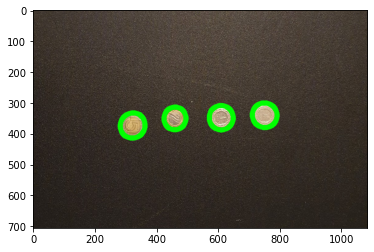

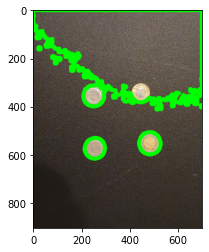

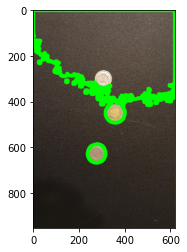

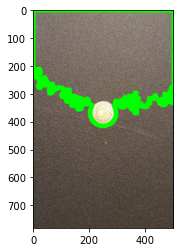

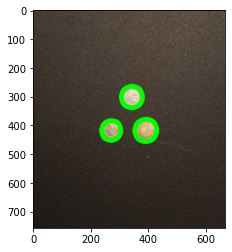

In [24]:
tab = ["c1.jpg","c2.jpg","c3.jpg","c4.jpg", "c5.jpg"]
#tab = ["b1.jpg","b2.jpg","b3.jpg","b4.jpg", "b5.jpg"]
#tab = ["mix1.jpg","mix2.jpg","mix3.jpg","mix4.jpg", "mix5.jpg"]
#tab = ["all1.jpg","all2.jpg","all3.jpg","all4.jpg", "all5.jpg"]

fig = 1
for i in range(len(tab)):
    img = cv2.imread(tab[i])
    #img = cv2.resize(img, (1000,1000))
    contour = find_contour(img)
    
    plt.figure(str(fig))
    plt.imshow(contour)
    fig+=1